In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv("data/Train.csv")

# Understanding Data

In [118]:
df.shape

(209499, 43)

In [119]:
df.duplicated().sum()

0

There are no duplicates in the data set

In [120]:
df.head(20)


,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
5,ID_TZ0005,45,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,...,?,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,4438.27,Below limit
6,ID_TZ0006,53,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,1401.23,Below limit
7,ID_TZ0007,22,Female,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,661.07,Below limit
8,ID_TZ0008,73,Female,7th and 8th grade,NaN,NaN,Married-civilian spouse present,Black,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1267.30,Below limit
9,ID_TZ0009,22,Female,11th grade,Private,NaN,Married-civilian spouse present,Black,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,3091.18,Below limit


In [121]:
df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

Noticing a lot of columns so might want to remove the ones that I don't want to investigate further

Columns that look useful:
age, gender, education, marital status, employment commitment, stocks status, citizenship, total employed, income above limit

# Cleaning Data

In [122]:
# Narrow down columns that I want to investigate further
df = df[['age', 'gender', 'education', 'marital_status', 'employment_commitment', 'stocks_status', 'total_employed', 'income_above_limit']]

In [123]:
# Check null value percentages for each column
df.isna().sum() / df.shape[0]

age                      0.0
gender                   0.0
education                0.0
marital_status           0.0
employment_commitment    0.0
stocks_status            0.0
citizenship              0.0
total_employed           0.0
income_above_limit       0.0
dtype: float64

Because there are no null values we do not need to trim down

In [124]:
df.duplicated().sum()

133282

# Exploratory Data Analysis

## Univariate Data

In [125]:
# Age
df["age"].mean()
df["age"].median()
df["age"].mode()

0    34
Name: age, dtype: int64

For age column:

Mean: 34.5
Median: 33
Mode: 34

<Axes: >

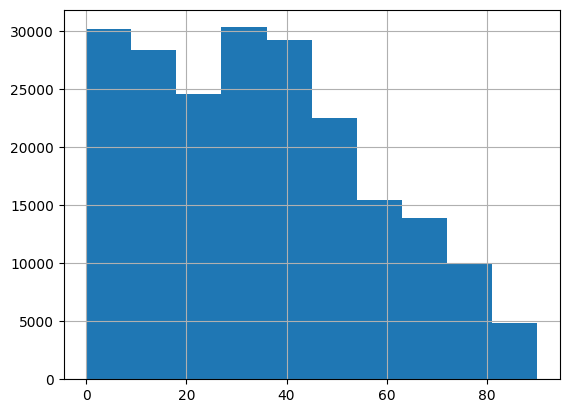

In [126]:
df["age"].hist()

Its interesting to see this distribution for age because I might want to know what this study looks like for young people (age 0-15) because estimating where they will lie in terms of income seems quite challenging/telling for what factors matter most

In [127]:
# Gender
df["gender"].value_counts()

gender
Female    108784
Male      100715
Name: count, dtype: int64

Male: 48.1%
Female: 51.9%

In [128]:
# Income predictions
df["income_above_limit"].value_counts()

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

Above limit: 6.2%
Below limit: 93.8%

This is a fascinating distribution that I want to investigate more

In [130]:
# Stocks status
df["stocks_status"].mean()

194.53342020725637

In [155]:
df["stocks_status"].value_counts()

stocks_status
0       187467
100       1202
500       1061
200        969
1000       948
         ...  
1085         1
3396         1
358          1
627          1
3508         1
Name: count, Length: 1499, dtype: int64

<Axes: xlabel='stocks_status'>

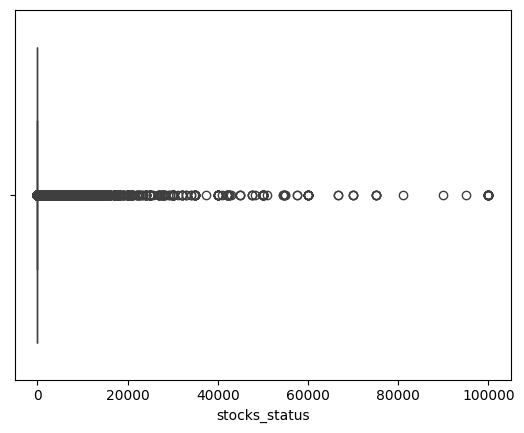

In [131]:
sns.boxplot(data=df, x="stocks_status")

In [133]:
# Education
df["education"].value_counts()

education
High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='Count'>

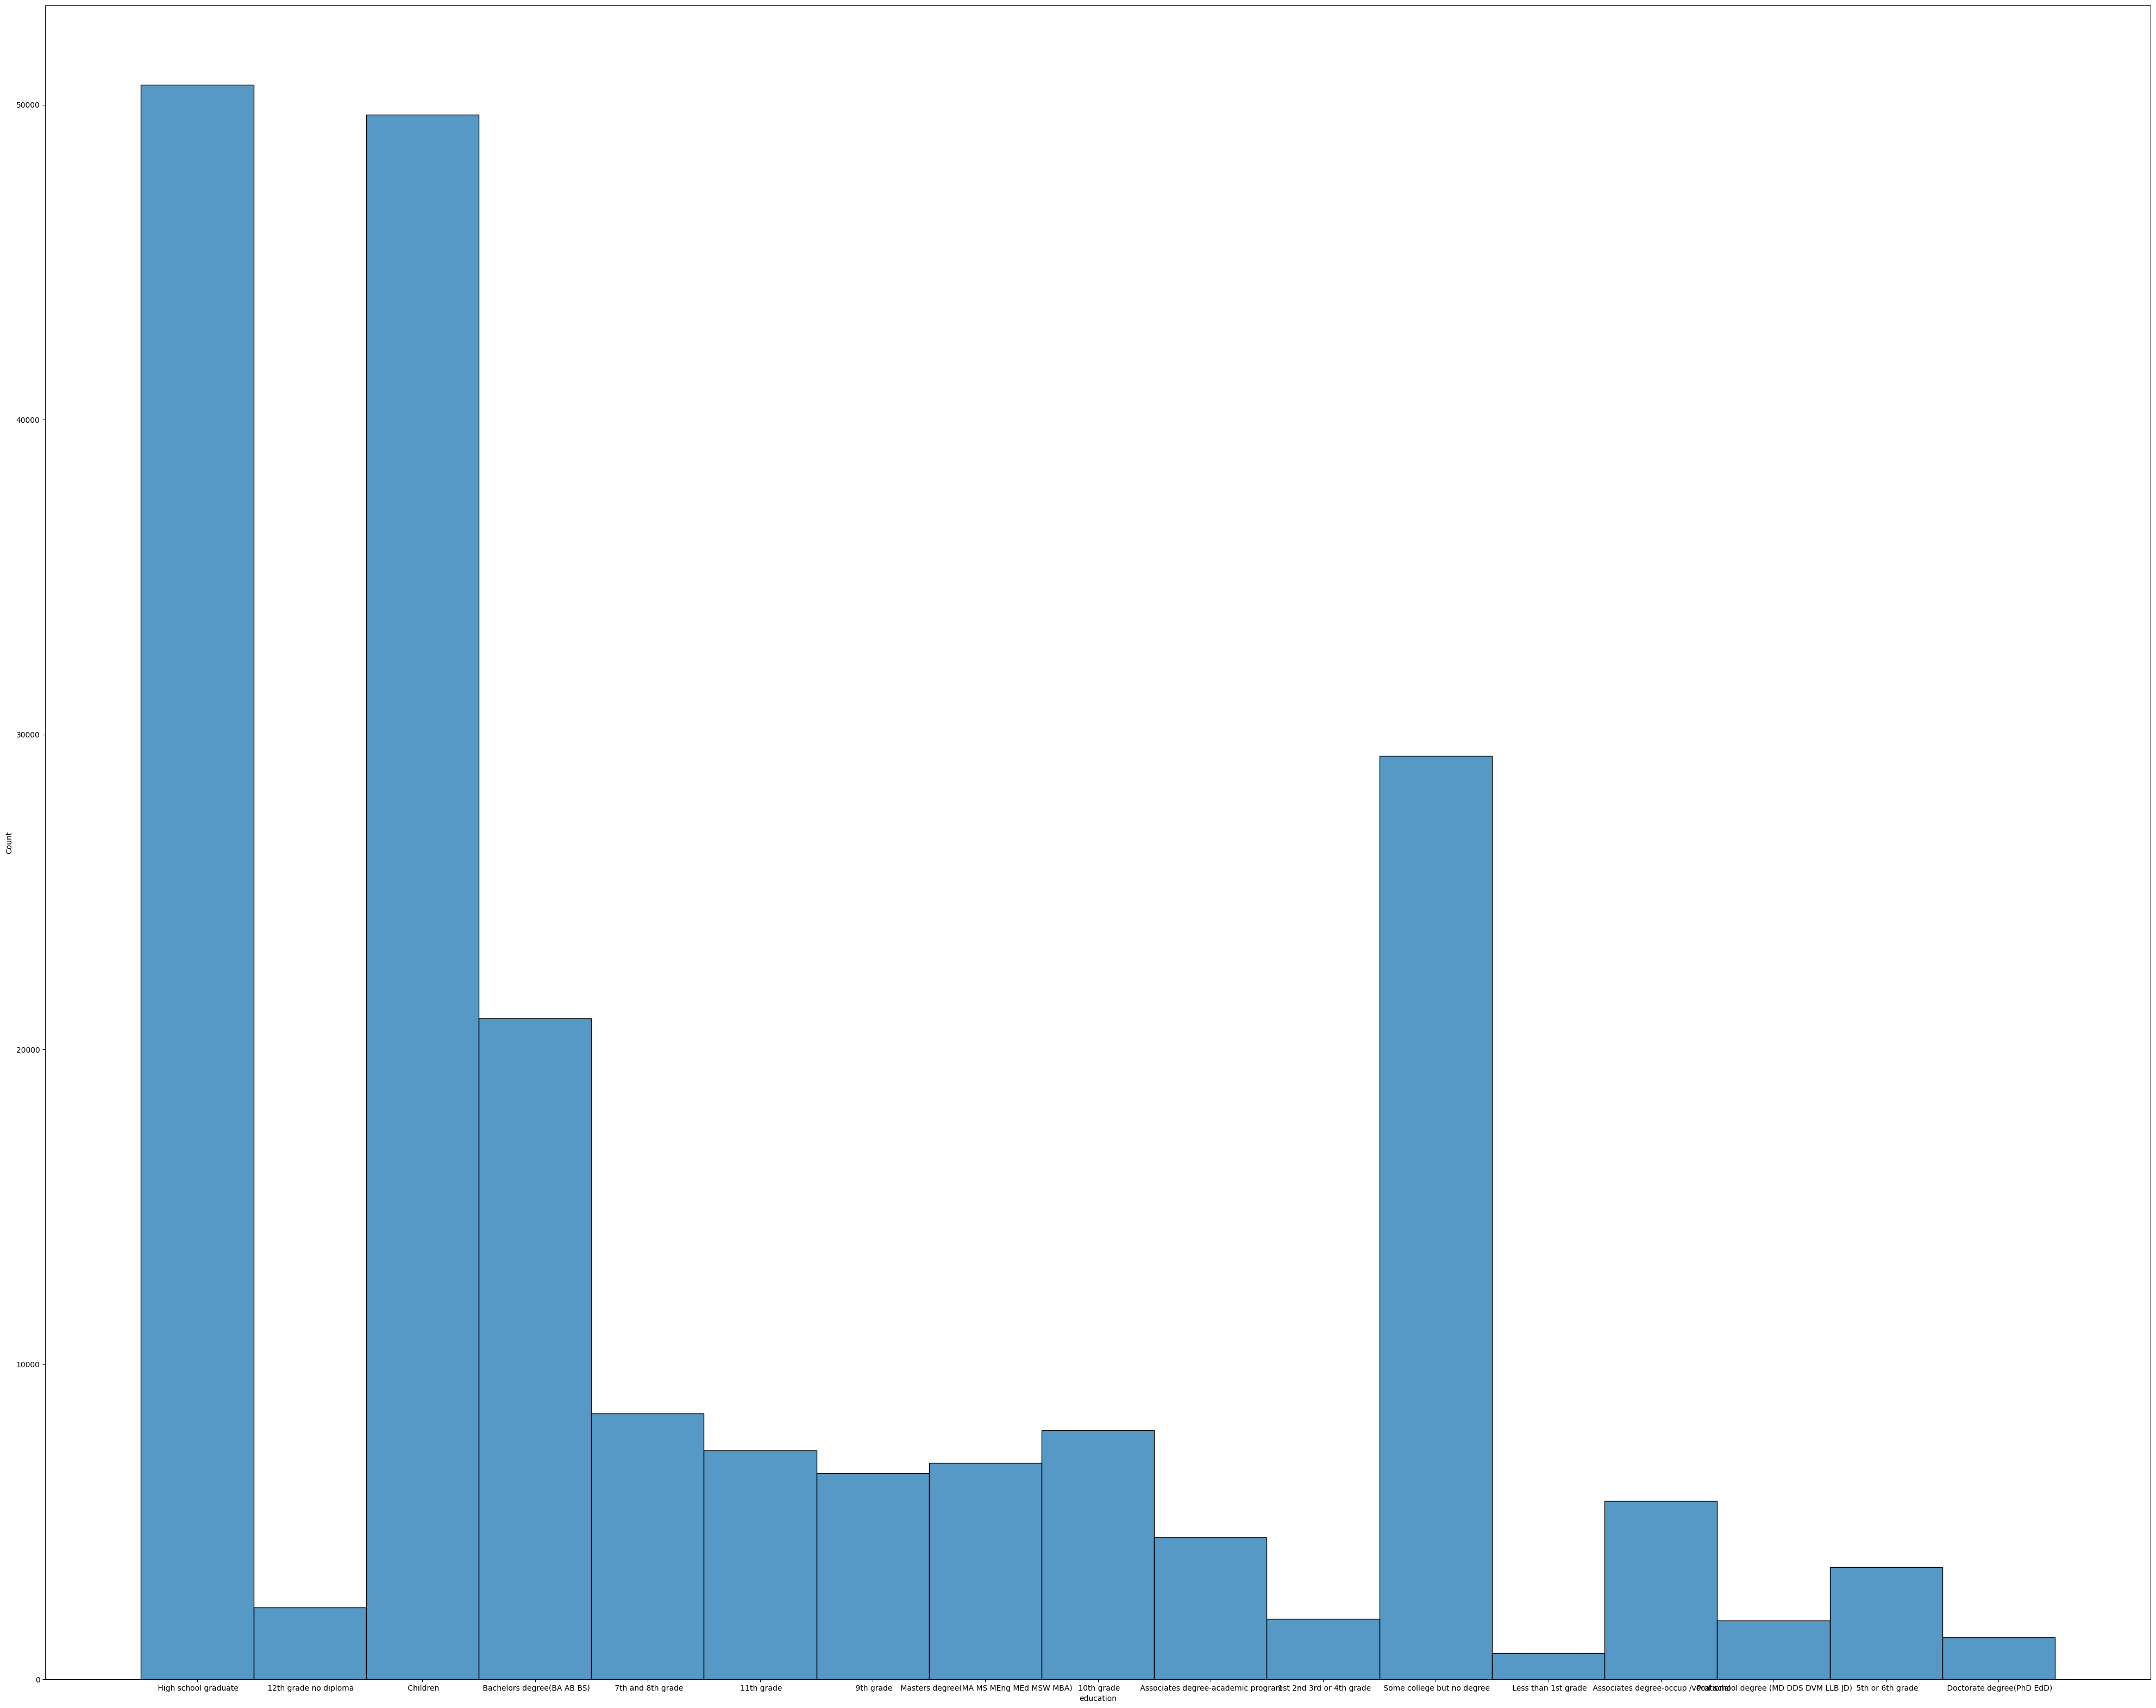

In [154]:
# Education
plt.figure(figsize=(50,40))
sns.histplot(data=df, x="education")

In [149]:
df["total_employed"].mean()
df["total_employed"].max() - df["total_employed"].min()

6

<Axes: xlabel='total_employed'>

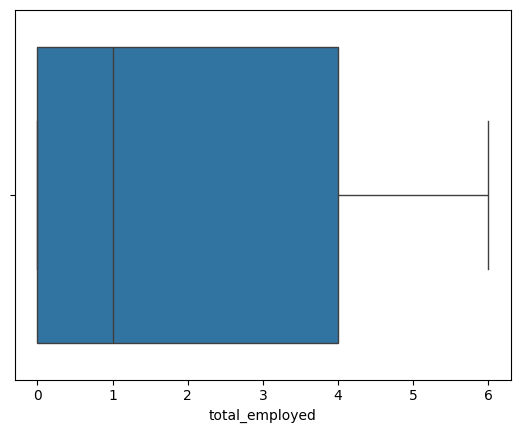

In [150]:
sns.boxplot(data=df, x="total_employed")

Not much deviation with the total_employed column
There doesn't seem to be that much of a difference between a compan

## Multivariate Data

<Axes: title={'center': 'Age vs. Stock Status'}, xlabel='age', ylabel='stocks_status'>

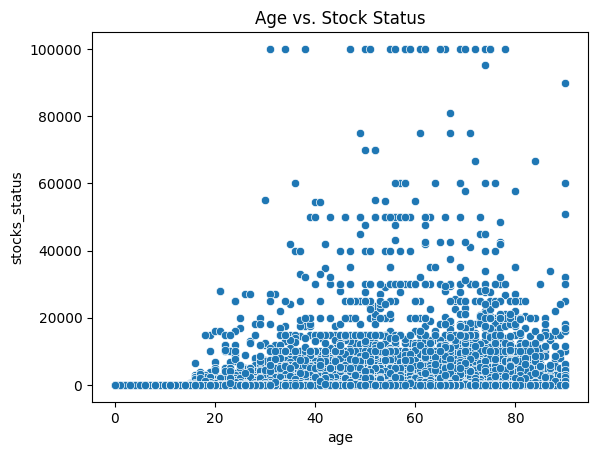

In [134]:
plt.title("Age vs. Stock Status")
sns.scatterplot(data=df,x="age", y="stocks_status")

I don't get much from this graph but would have been interesting to investigate

Because the key column is predicted income, which is categorical data, it doesn't make much sense to do multivariable data analysis

# Statistical Analysis

## Key Questions
1. What is the average stock status of those above the income average versus those that are predicted to be below the income average?
2. What percent of those that are married are expected to be above the income average and how does that compare to those that are not married (and over the age of 30)?
3. For those that are expected to be above the income average, what percent are citizens AND are employed

In [135]:
# Question 1
df["stocks_status"].loc[df["income_above_limit"] == "Above limit"].mean() - df["stocks_status"].loc[df["income_above_limit"] == "Below limit"].mean()

1460.03243462056

The range in average stock status of those predicted to be above average income versus below is $1460 worth of stocks

In [143]:
# Question 2
df["marital_status"].loc[df["income_above_limit"] == "Above limit"].value_counts()
df["marital_status"].loc[df["income_above_limit"] == "Below limit"].value_counts()


marital_status
Never married                      89553
Married-civilian spouse present    78313
Divorced                           12361
Widowed                            10664
Separated                           3439
Married-spouse absent               1464
Married-A F spouse present           707
Name: count, dtype: int64

77.7% of predicted above income earners are currently married with a spouse present
9.0% have never been married
12.4% were once married and now are not (divorced, widowed, separated)

39.9% of predicted below income earners are currently married with a spouse present
45.7% have never been married
13.5% were once married and now are not (divorced, widowed, separated)




In [142]:
# Question 3
df.query("(education == 'Children')")

,age,gender,education,marital_status,employment_commitment,stocks_status,citizenship,total_employed,income_above_limit
